# Desafío 3: Regresión logística 

## Aplicamos el modelo `Logistic Regression` de `scikit-learn` a los datos de intenciones de compras en línea.

## 1. Introducción

**Información del DataSet:**

El dataset consiste en vectores de características que pertenecen a 12330 sesiones. 
El conjunto de datos se conformó de manera que cada sesión pertenezca a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, perfil de usuario o período. 

El conjunto de datos original consta de 10 atributos numéricos y 8 atributos categóricos. 
El atributo *'Revenue'* (Ingresos) se utiliza como etiqueta de clasificación. 

*"Administrative"* (Administrativa), *"Administrative Duration"* (Duración administrativa), *"Informational"* (Informativa), *"Informational Duration"* (Duración informativa), *"Product Related"* (Producto relacionado) y *"Product Related Duration"* (Duración producto relacionado) representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada una de estas categorías de páginas. Los valores de estas funciones se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo: pasar de una página a otra. 

*Respecto a Google Analytics:*
Las características *"Bounce Rate"* (Tasa de rebote), *"Exit Rate"* (Tasa de salida) y ***"Page Value"* (Valor de la página)** representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la función "Índice de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebote") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la columna "Tasa de salida" para una página web específica se calcula como el porcentaje del total de páginas en cada página fue la última en ser visitada en la sesión. La característica **"Valor de página"** representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. 

*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset*


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Cristian en Colab:
path='gdrive/My Drive/DataScience - DH/Desafio3/'



---



---



In [0]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import savefig

Populating the interactive namespace from numpy and matplotlib


In [0]:
df = pd.read_pickle('{}online_shoppers_intention_dummies.pkl'.format(path))

#### Armamos las matrices X e y 

In [0]:
display(df.head())
df.columns

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,New_Visitor,Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,1,1


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue',
       'New_Visitor', 'Returning_Visitor', 'Weekend_True'],
      dtype='object')

In [0]:
X = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'New_Visitor', 'Returning_Visitor', 'Weekend_True']]
y = df["Revenue"]

#### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.sum())
print(y_test.shape)
print(y_test.sum())


(9247, 18)
(3083, 18)
(9247,)
1431
(3083,)
477


#### Estandarización

In [0]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']] = scaler.fit_transform(X_train[
        ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']])
X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,New_Visitor,Returning_Visitor,Weekend_True
7707,-0.693703,-0.449357,0.394987,1.513001,0.942128,0.343795,-0.345085,-0.485008,-0.316081,-0.307229,-0.479130,-0.135140,-0.214603,-0.898105,-0.514356,0,1,0
9716,0.817694,0.547227,-0.392857,-0.241897,-0.078657,-0.061895,-0.456010,-0.425622,-0.316081,-0.307229,1.288597,0.956249,-0.214603,1.179751,-0.266415,0,1,0
11246,-0.693703,-0.449357,1.182831,10.559979,1.758757,1.102546,-0.288110,-0.586265,-0.316081,-0.307229,0.993976,-0.135140,-0.214603,0.348609,0.973289,0,1,1
7075,-0.693703,-0.449357,-0.392857,-0.241897,0.737971,0.948192,-0.096178,-0.099889,-0.316081,-0.307229,0.404734,-0.135140,-0.214603,-0.898105,-0.762297,0,1,0
9944,-0.693703,-0.449357,-0.392857,-0.241897,-0.623076,-0.561419,1.596103,1.674888,-0.316081,-0.307229,0.993976,0.956249,-0.214603,1.179751,2.212994,0,1,0


## Regresión logística con `sklearn`

Aplicamos sobre los datos de test, la transformación para estandarizar valores, de igual manera que en train, para mantener la consistencia de tipos de datos.

In [0]:
X_test[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']] = scaler.transform(X_test[
        ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Aplicamos el modelo `Logistic Regression` por defecto

In [0]:
#from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[2546   60]
 [ 305  172]]


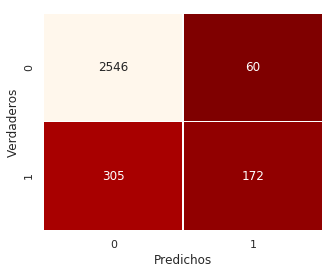

In [0]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred_test))

sns.set(rc={'figure.figsize':(5,4)})
sns_cfmx = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", linewidths=.5, cmap="OrRd_r", cbar=False)

#print(accuracy_score(y_test, y_pred_test))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

sns_cfmx.plot()
fig = sns_cfmx.get_figure()
fig.savefig("{}Logistic_Regression_heatmap.png".format(path), dpi=400)

In [0]:
print('accuracy score = {}'.format(accuracy_score(y_test, y_pred_test)))

accuracy score = 0.8816088225754135


In [0]:
from sklearn.metrics import recall_score

# sensitivity = TP / float(FN + TP)
print('recall score = {}'.format(recall_score(y_test, y_pred_test)))

recall score = 0.36058700209643607


In [0]:
from sklearn.metrics import precision_score

# precision = TP / float(TP + FP)
print('precision score = {}'.format(precision_score(y_test, y_pred_test)))

precision score = 0.7413793103448276


#### Métricas computadas desde la matriz de confusión: F1-Score

Es un promedio armónico entre precision y recall.

In [0]:
from sklearn.metrics import f1_score

# f1 = 2*((precision*sensitivity)/(precision+sensitivity))
print('F1 score = {}'.format(f1_score(y_test,y_pred_test)))

F1 score = 0.48519040902679833


In [0]:
from sklearn.metrics import roc_auc_score, classification_report

In [0]:
roc_auc_score(y_test, y_pred_test)

0.6687816054227385

In [0]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2606
           1       0.74      0.36      0.49       477

    accuracy                           0.88      3083
   macro avg       0.82      0.67      0.71      3083
weighted avg       0.87      0.88      0.86      3083



Logistic Regression (área = 0.67)


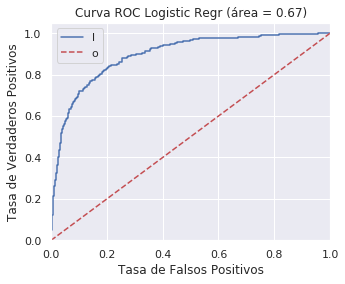

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('Logistic Regression (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regr (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC'+' Logistic Regr (área = %0.2f)' % logit_roc_auc)
plt.legend("lower right")
plt.savefig("{}Logistic_Regression_ROC.png".format(path), dpi=400)
plt.show()

### Conclusión de aplicar el modelo `Logistic Regression` por defecto:

El modelo presenta alto `accuracy` y `precision`, pero muy baja precisión al predecir los verdaderos positivos durante la fase de test para  `recall` y media armónica de recall y precisión `F1`. Esto generalmente se presenta cuando los datos no están balanceados, por lo que el modelo infiere mayor proporción del target más común.



---



---

